# Impor Library

In [ ]:
import gdown
import os
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

Kode ini mengimpor berbagai pustaka yang diperlukan untuk pemrosesan dataset, analisis data, dan pembangunan model machine learning. Library yang digunakan mencakup pengunduhan dataset, manipulasi file, pengolahan data numerik, visualisasi, serta pembelajaran mesin. Selain itu, peringatan dinonaktifkan untuk menjaga output tetap bersih.

#Load Dataset

In [ ]:
#membaca dataset https://drive.google.com/file/d/13dk8pNPNKgJwtHFRsnLU8QrX6bIU13f7/view?usp=drive_link
file_id = "13dk8pNPNKgJwtHFRsnLU8QrX6bIU13f7"
url = f"https://drive.google.com/uc?id={file_id}"
output = "dataset.zip"

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=13dk8pNPNKgJwtHFRsnLU8QrX6bIU13f7
From (redirected): https://drive.google.com/uc?id=13dk8pNPNKgJwtHFRsnLU8QrX6bIU13f7&confirm=t&uuid=503f35af-91cb-44bc-acc7-400d246c7e2f
To: /content/dataset.zip
100%|██████████| 319M/319M [00:05<00:00, 54.9MB/s]


'dataset.zip'

Mengunduh dataset dari Google Drive menggunakan gdown. File diakses melalui ID Google Drive, kemudian diunduh dalam format ZIP untuk digunakan dalam proses selanjutnya. 🚀

In [ ]:
%%capture
!unzip /content/dataset.zip

Mengekstrak file dataset yang dikompresi dalam format ZIP.

# Data Preparation

In [ ]:
dataset_path = '/content/Dataset'

folder_counts = {folder: len(os.listdir(os.path.join(dataset_path, folder)))
                 for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))}

df_counts = pd.DataFrame(list(folder_counts.items()), columns=["Folder", "Jumlah Gambar"])
df_counts = df_counts.sort_values(by="Jumlah Gambar", ascending=False)

print("\nJumlah data per folder:")
for folder, count in df_counts.itertuples(index=False):
    print(f"- {folder}: {count} gambar")

total_images = df_counts["Jumlah Gambar"].sum()
print(f"\nTotal jumlah dataset: {total_images}")


Jumlah data per folder:
- Acne and Rosacea: 873 gambar
- Actinic Keratosis Basal Cell Carcinoma: 442 gambar
- Disorders of Pigmentation: 329 gambar
- Warts Molluscum and other Viral Infections: 299 gambar
- Cellulitis Impetigo: 213 gambar
- Chickenpox: 170 gambar
- Tinea Ringworm Candidiasis: 164 gambar
- Shingles: 163 gambar
- Nail Fungus: 162 gambar
- Vascular Tumors: 138 gambar
- Normal: 129 gambar
- Cutaneous Larva Migrans: 125 gambar
- Athlete Foot: 124 gambar
- Atopic Dermatitis: 124 gambar
- Lupus: 115 gambar
- Ringworm: 113 gambar
- Seborrheic Keratoses: 111 gambar
- Systemic Disease: 108 gambar
- Psoriasis pictures Lichen Planus: 86 gambar
- Poison Ivy and Contact Dermatitis: 75 gambar
- Herpes HPV: 46 gambar
- Eczema: 37 gambar
- Melanoma Skin Cancer Nevi: 29 gambar
- Exanthems: 26 gambar
- Vasculitis: 16 gambar
- Urticaria Hives: 5 gambar

Total jumlah dataset: 4222


Menghitung jumlah gambar dalam setiap kategori yang terdapat dalam dataset. Dataset terdiri dari berbagai jenis penyakit kulit, dengan jumlah gambar yang bervariasi di setiap kategori.

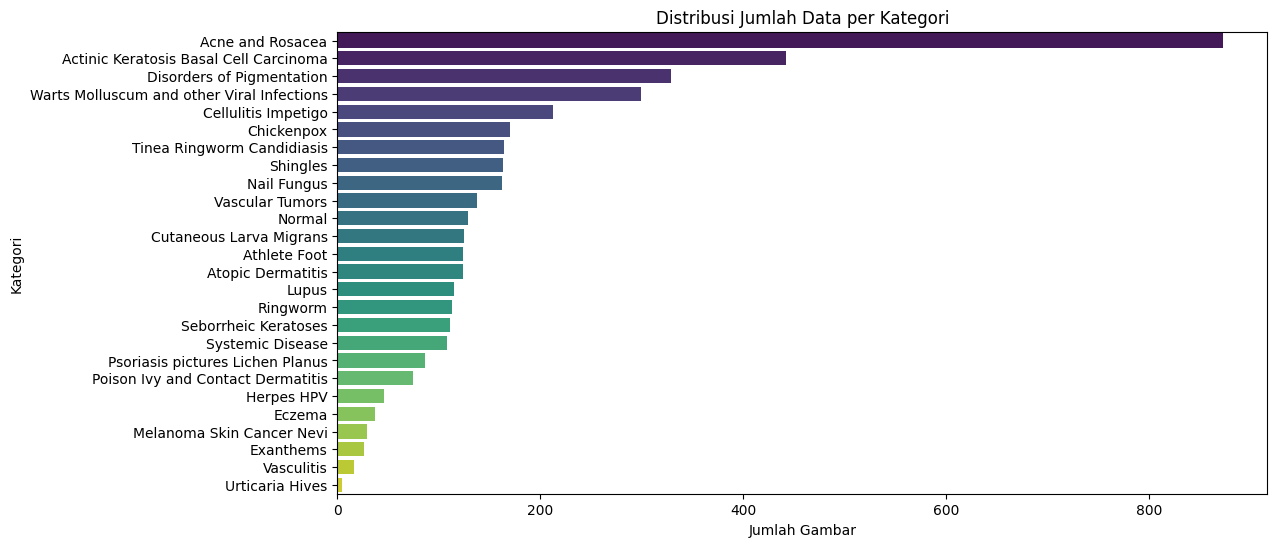

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts, x="Jumlah Gambar", y="Folder", palette="viridis")
plt.xlabel("Jumlah Gambar")
plt.ylabel("Kategori")
plt.title("Distribusi Jumlah Data per Kategori")
plt.show()

Terlihat bahwa gambaran distribusi jumlah data tiap kategori tidak seimbang.


Dataset setelah dipilih 5 kategori yang seimbang:
- Cutaneous Larva Migrans: 125 gambar
- Athlete Foot: 124 gambar
- Atopic Dermatitis: 124 gambar
- Lupus: 115 gambar
- Ringworm: 113 gambar

Total jumlah dataset setelah pemilihan: 601


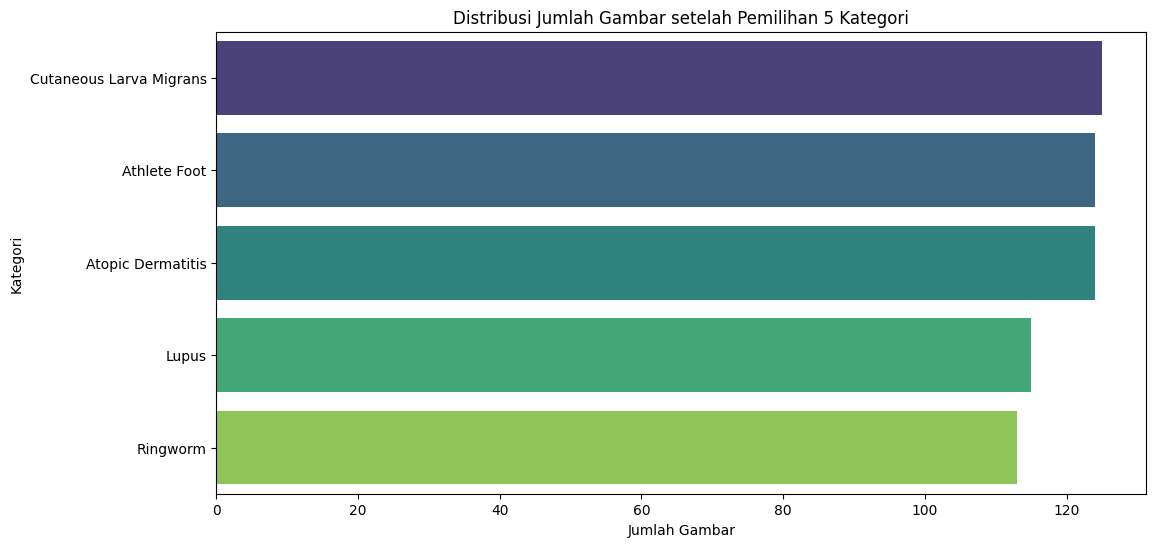

In [ ]:
selected_categories = ["Cutaneous Larva Migrans", "Athlete Foot", "Atopic Dermatitis", "Lupus", "Ringworm"]

folder_counts = {folder: len([f for f in os.listdir(os.path.join(dataset_path, folder))
                              if os.path.isfile(os.path.join(dataset_path, folder, f))])
                 for folder in selected_categories if os.path.isdir(os.path.join(dataset_path, folder))}

print("\nDataset setelah dipilih 5 kategori yang seimbang:")
for folder, count in folder_counts.items():
    print(f"- {folder}: {count} gambar")

total_images = sum(folder_counts.values())
print(f"\nTotal jumlah dataset setelah pemilihan: {total_images}")

df_counts = pd.DataFrame(list(folder_counts.items()), columns=["Folder", "Jumlah Gambar"])
df_counts = df_counts.sort_values(by="Jumlah Gambar", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts, x="Jumlah Gambar", y="Folder", palette="viridis")
plt.xlabel("Jumlah Gambar")
plt.ylabel("Kategori")
plt.title("Distribusi Jumlah Gambar setelah Pemilihan 5 Kategori")
plt.show()

Tahap ini melakukan seleksi kategori dengan memilih lima jenis penyakit kulit yang memiliki jumlah data yang lebih seimbang, yaitu Cutaneous Larva Migrans, Athlete Foot, Atopic Dermatitis, Lupus, dan Ringworm. Setelah pemilihan, jumlah gambar dalam setiap kategori dihitung dan ditampilkan untuk memastikan distribusi yang lebih merata.

In [ ]:
new_dataset = "/content/New_Dataset"
os.makedirs(new_dataset, exist_ok=True)

selected_categories = ["Cutaneous Larva Migrans", "Athlete Foot", "Atopic Dermatitis", "Lupus", "Ringworm"]

for folder in selected_categories:
    folder_path = os.path.join(dataset_path, folder)

    if os.path.isdir(folder_path):
        new_folder_path = os.path.join(new_dataset, folder)
        os.makedirs(new_folder_path, exist_ok=True)

        for img in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img)
            if os.path.isfile(img_path):
                shutil.copy(img_path, new_folder_path)

print("\nDataset baru dengan 5 kategori telah disimpan di:", new_dataset)


Dataset baru dengan 5 kategori telah disimpan di: /content/New_Dataset


Membuat folder baru dengan nama New_Dataset untuk tempat menyimpan dataset yang sudah dipilih. Loop melalui setiap kategori yang dipilih dan memindahkan gambar dari folder asli ke folder baru dengan menggunakan shutil.copy() agar dataset tetap terstruktur dengan subfolder.

# Data Preprocessing

In [ ]:
split_dataset_path = "/content/"
os.makedirs(split_dataset_path, exist_ok=True)

for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(split_dataset_path, split), exist_ok=True)

selected_categories = ["Cutaneous Larva Migrans", "Athlete Foot", "Atopic Dermatitis", "Lupus", "Ringworm"]

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

for folder in selected_categories:
    folder_path = os.path.join(dataset_path, folder)

    if os.path.isdir(folder_path):
        images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        random.shuffle(images)

        train_count = int(len(images) * train_ratio)
        val_count = int(len(images) * val_ratio)
        test_count = len(images) - train_count - val_count

        for split, count in zip(["train", "val", "test"], [train_count, val_count, test_count]):
            split_folder_path = os.path.join(split_dataset_path, split, folder)
            os.makedirs(split_folder_path, exist_ok=True)

            for img in images[:count]:
                shutil.copy(os.path.join(folder_path, img), os.path.join(split_folder_path, img))

            images = images[count:]

print("\nDataset telah dibagi menjadi Train, Validation, dan Test di:", split_dataset_path)


Dataset telah dibagi menjadi Train, Validation, dan Test di: /content/


Tahap ini melakukan pembagian dataset menjadi tiga bagian utama: Train (70%), Validation (15%), dan Test (15%). Pembagian ini bertujuan untuk memastikan model dapat belajar dari data pelatihan, divalidasi dengan data yang belum pernah dilihat sebelumnya, dan diuji untuk mengevaluasi performanya. Lima kategori yang telah dipilih sebelumnya digunakan dalam proses ini, dan setiap gambar dalam kategori tersebut diacak sebelum dibagi ke dalam masing-masing set. Setelah pembagian selesai, dataset disimpan dalam folder yang sesuai untuk digunakan dalam pelatihan model.

# Data Augmentasi

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/train"
val_path = "/content/val"
test_path = "/content/test"

training_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalisasi pixel (0-1)
    rotation_range=40,      # Rotasi hingga 40 derajat
    width_shift_range=0.2,  # Geser horizontal hingga 20%
    height_shift_range=0.2, # Geser vertikal hingga 20%
    shear_range=0.2,        # Shear transformasi
    zoom_range=0.2,         # Zoom hingga 20%
    horizontal_flip=True,   # Flipping horizontal
    fill_mode="nearest"     # Mengisi area kosong dengan metode terdekat
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset untuk training
train_generator = training_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=126,
    class_mode="categorical"
)

val_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=126,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=126,
    class_mode="categorical"
)

print("\nDataset telah siap untuk training!")

Found 418 images belonging to 5 classes.
Found 87 images belonging to 5 classes.
Found 96 images belonging to 5 classes.

Dataset telah siap untuk training!


Meningkatkan variasi gambar dalam dataset pelatihan tanpa menambah jumlah data secara manual. Teknik augmentasi yang digunakan meliputi rotasi, pergeseran, zoom, flipping horizontal, dan shear transformasi, yang membantu model belajar fitur yang lebih beragam dan mengurangi risiko overfitting. Selain itu, semua gambar dinormalisasi dengan skala 1./255 agar nilai pixel berada dalam rentang 0-1, yang mempercepat konvergensi saat pelatihan. Dataset Train menggunakan augmentasi untuk meningkatkan keragaman data, sementara Validation dan Test hanya dinormalisasi tanpa augmentasi agar evaluasi model tetap akurat.

#Modeling

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 kelas
])

model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,814,021 (25.99 MB)

 Trainable params: 6,814,021 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

Model terdiri dari beberapa lapisan konvolusi yang mengekstrak fitur dari gambar, diikuti oleh lapisan pooling untuk mengurangi dimensi data. Setelah fitur diekstrak, data diratakan dengan lapisan Flatten, lalu diproses oleh lapisan Dense dengan 512 unit untuk pembelajaran lebih dalam. Dropout digunakan untuk mencegah overfitting, dan lapisan output dengan 5 unit serta aktivasi softmax digunakan untuk klasifikasi ke lima kategori penyakit kulit. Model dikompilasi menggunakan Adam optimizer dengan learning rate 0.00005, dan menggunakan categorical crossentropy sebagai fungsi loss karena dataset memiliki lebih dari dua kelas.

# Data Generator

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=val_generator
)

print("\nTraining selesai!")

Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.2342 - loss: 1.6107 - val_accuracy: 0.2069 - val_loss: 1.6050
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 734ms/step - accuracy: 0.2194 - loss: 1.6004 - val_accuracy: 0.2069 - val_loss: 1.6008
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1828 - loss: 1.5986 - val_accuracy: 0.2069 - val_loss: 1.5933
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 766ms/step - accuracy: 0.2199 - loss: 1.5928 - val_accuracy: 0.2069 - val_loss: 1.5841
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 925ms/step - accuracy: 0.2419 - loss: 1.5817 - val_accuracy: 0.2529 - val_loss: 1.5741
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2927 - loss: 1.5737 - val_accuracy: 0.3448 - val_loss: 1.5633
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 919ms/step - accuracy: 0.3065 - loss: 1.5686 - val_accuracy: 0.3908 - val_loss: 1.5507
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 926ms/step - accuracy: 0.3392 - loss: 1.5470 - val_accuracy: 0.3333 - val_loss: 1.5351


Pelatihan model CNN menggunakan data generator dengan mekanisme early stopping dan learning rate scheduler untuk meningkatkan efisiensi pelatihan.

- EarlyStopping digunakan untuk menghentikan pelatihan jika val_loss tidak membaik setelah 5 epoch, sehingga menghindari overfitting.
- ReduceLROnPlateau menurunkan learning rate jika val_loss stagnan selama 3 epoch, membantu model beradaptasi dengan lebih baik.
- Model dilatih selama 80 epoch, dengan akurasi pelatihan mencapai 67.22% dan akurasi validasi 58.62%, menunjukkan bahwa model sudah belajar pola dari data tetapi masih bisa ditingkatkan lebih lanjut.

# Plotting Akurasi dan Loss Model Awal


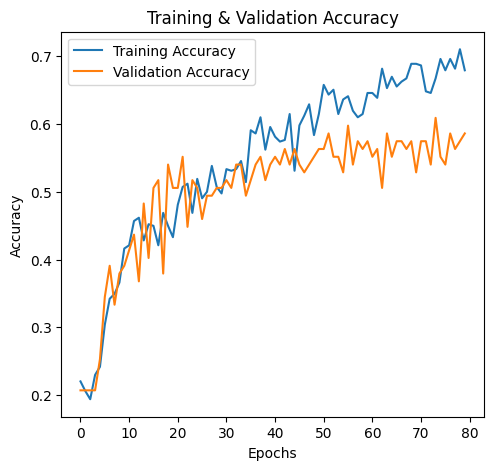

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

Grafik plot akurasi menunjukkan bagaimana model belajar dari data selama 80 epoch. Pada awal pelatihan, akurasi training dan validasi masih rendah, sekitar 20-25%, yang menandakan bahwa model masih dalam tahap awal memahami pola dari dataset. Seiring bertambahnya epoch, akurasi training meningkat secara bertahap hingga mencapai 67.22%, sementara akurasi validasi juga mengalami peningkatan tetapi dengan fluktuasi yang lebih besar, berakhir di 58.62%. Perbedaan antara akurasi training dan validasi menunjukkan adanya gap, yang bisa menjadi indikasi overfitting, di mana model terlalu menyesuaikan diri dengan data training tetapi kurang mampu menggeneralisasi data baru.


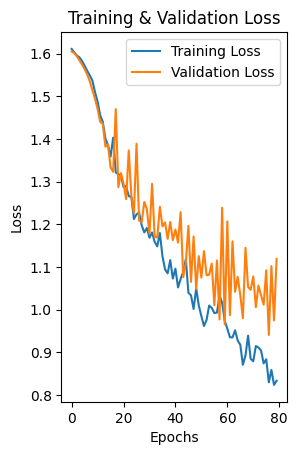

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')

plt.show()

Grafik plot loss menunjukkan bagaimana kerugian (loss) dari model berubah selama proses pelatihan. Pada awal pelatihan, loss training dan loss validasi masih tinggi, sekitar 1.6, yang menandakan bahwa model belum mampu mengenali pola dengan baik. Seiring bertambahnya epoch, loss training mengalami penurunan secara bertahap, menunjukkan bahwa model semakin baik dalam memprediksi data training. Namun, loss validasi mengalami fluktuasi, yang bisa menjadi indikasi bahwa model belum sepenuhnya mampu menggeneralisasi data baru dengan baik.

# Tunning Model menggunakan VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,912,069 (72.14 MB)

 Trainable params: 4,197,381 (16.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Model CNN ditingkatkan dengan menggunakan VGG16, sebuah arsitektur deep learning yang telah dilatih sebelumnya pada dataset ImageNet. Dengan pendekatan transfer learning, model memanfaatkan fitur yang telah dipelajari oleh VGG16 untuk meningkatkan akurasi klasifikasi penyakit kulit.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

history = model.fit(
    train_generator,
    epochs=80,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler]
)

print("\nTraining selesai!")

Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 51s 10s/step - accuracy: 0.2152 - loss: 1.8781 - val_accuracy: 0.1954 - val_loss: 1.5687 - learning_rate: 5.0000e-05
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2346 - loss: 1.7060 - val_accuracy: 0.4023 - val_loss: 1.4367 - learning_rate: 5.0000e-05
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3570 - loss: 1.5206 - val_accuracy: 0.5402 - val_loss: 1.3264 - learning_rate: 5.0000e-05
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3382 - loss: 1.4654 - val_accuracy: 0.6322 - val_loss: 1.2410 - learning_rate: 5.0000e-05
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3960 - loss: 1.4233 - val_accuracy: 0.6782 - val_loss: 1.1714 - learning_rate: 5.0000e-05
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 916ms/step - accuracy: 0.4747 - loss: 1.3081 - val_accuracy: 0.6897 - val_loss: 1.1067 - learning_rate: 5.0000e-05
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 885ms/step - accuracy: 0.4697 - loss: 1.2461 - va

Tahap ini melakukan pelatihan model VGG16 dengan menggunakan Early Stopping dan Learning Rate Scheduler untuk meningkatkan efisiensi dan stabilitas pelatihan.

# Plotting Akurasi dan Loss After Tunning


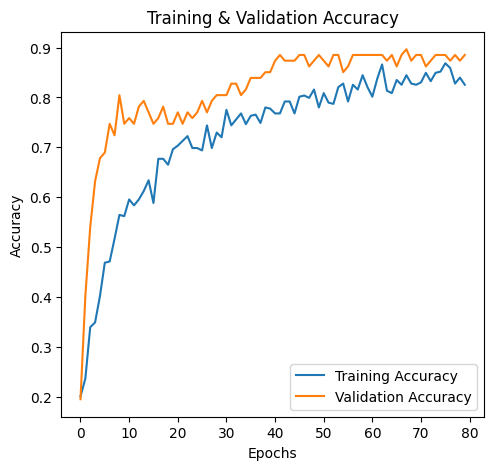

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

Grafik plot akurasi dari model VGG16 menunjukkan bagaimana akurasi training dan akurasi validasi meningkat selama proses pelatihan. Akurasi training meningkat secara bertahap hingga mencapai 80-85%, sementara akurasi validasi juga mengalami peningkatan yang stabil, berakhir di 88.51%. Perbedaan antara akurasi training dan validasi cukup kecil, yang menunjukkan bahwa model tidak mengalami overfitting secara signifikan. Dengan hasil ini, model VGG16 menunjukkan performa yang lebih baik dibandingkan model sebelumnya, dengan akurasi validasi yang lebih tinggi dan lebih konsisten.

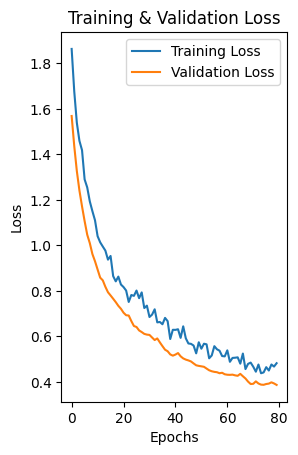

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')

plt.show()

Grafik plot loss dari model VGG16 menunjukkan bagaimana kerugian (loss) berkurang selama proses pelatihan. Loss validasi juga mengalami penurunan, yang menunjukkan bahwa model mampu menggeneralisasi data dengan baik. Di akhir pelatihan, loss training mencapai 0.49, sedangkan loss validasi berada di 0.38, menunjukkan bahwa model telah belajar dengan baik dan tidak mengalami overfitting yang signifikan. Dengan hasil ini, model VGG16 menunjukkan performa yang lebih baik dibandingkan model sebelumnya, dengan loss yang lebih rendah dan lebih konsisten

# Save Model

In [ ]:
save_path = 'mymodel/'
tf.saved_model.save(model, save_path)

Tahap ini menyimpan model yang telah dilatih menggunakan TensorFlow SavedModel format. Model disimpan dalam direktori (mymodel/)

In [ ]:
dir_name = '/content/mymodel'
output_filename = 'mymodel.zip'

shutil.make_archive(output_filename.replace('.zip',''), 'zip', dir_name)

'/content/mymodel.zip'

melakukan kompresi model yang telah disimpan ke dalam format ZIP menggunakan shutil. Model yang berada di folder mymodel dikompresi menjadi (mymodel.zip), sehingga lebih mudah untuk dibagikan, diunduh, atau disimpan dengan ukuran yang lebih kecil. Langkah ini berguna untuk backup model atau deployment ke sistem lain tanpa kehilangan struktur dan parameter yang telah dilatih.

In [ ]:
model.save("model.h5")

Menyimpan model dalam format HDF5 (.h5), yang memungkinkan model untuk di-load kembali dengan mudah tanpa perlu melakukan pelatihan ulang. Format .h5 menyimpan arsitektur model, bobot, dan konfigurasi pelatihan.

# Inference Model

Saving lupus-acute-31.jpg to lupus-acute-31.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


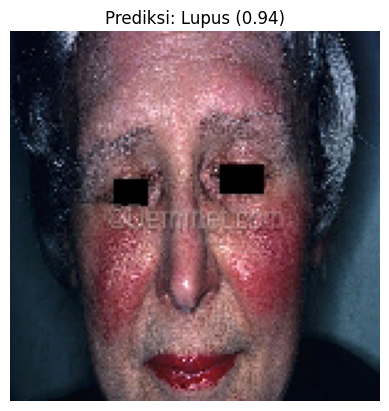

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()
model = tf.keras.models.load_model('model.h5')
class_names = list(test_generator.class_indices.keys())

for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_class} ({confidence:.2f})")
    plt.show()

melakukan inferensi model, yaitu proses menggunakan model yang telah dilatih untuk memprediksi kategori dari gambar baru yang diunggah. Dalam hasil ini, model berhasil memprediksi gambar sebagai Lupus dengan tingkat kepercayaan 94%, menunjukkan bahwa model telah belajar dengan baik dan mampu mengklasifikasikan gambar dengan akurasi tinggi.

#Kesimpulan

Proyek ini berhasil membangun model deep learning untuk klasifikasi penyakit kulit menggunakan CNN dan VGG16 dengan pendekatan transfer learning. Model awal menunjukkan peningkatan akurasi yang cukup baik, tetapi setelah dilakukan fine-tuning dengan VGG16, performa meningkat secara signifikan dengan akurasi validasi mencapai 88.51% dan loss yang lebih stabil. Proses ini mencakup beberapa tahapan penting, mulai dari preprocessing dataset, termasuk pembagian data menjadi Train, Validation, dan Test, hingga data augmentasi yang membantu meningkatkan variasi gambar dan mengurangi risiko overfitting. Model awal dibangun menggunakan CNN dari awal, kemudian ditingkatkan dengan fine-tuning VGG16, yang memungkinkan model memanfaatkan fitur yang telah dipelajari sebelumnya untuk meningkatkan akurasi dan generalisasi. Selain itu, Early Stopping dan Learning Rate Scheduler digunakan untuk memastikan model mencapai konvergensi yang lebih stabil. Pada tahap akhir, model diuji dengan inferensi, di mana pengguna dapat mengunggah gambar baru dan mendapatkan prediksi dengan tingkat kepercayaan tinggi. Hasil akhir menunjukkan bahwa model VGG16 mampu mengklasifikasikan gambar dengan akurasi tinggi, menjadikannya solusi yang potensial untuk deteksi penyakit kulit.